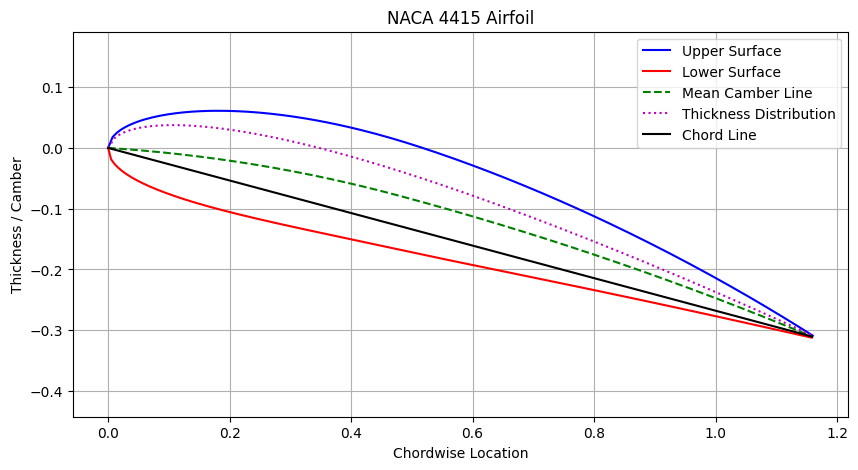

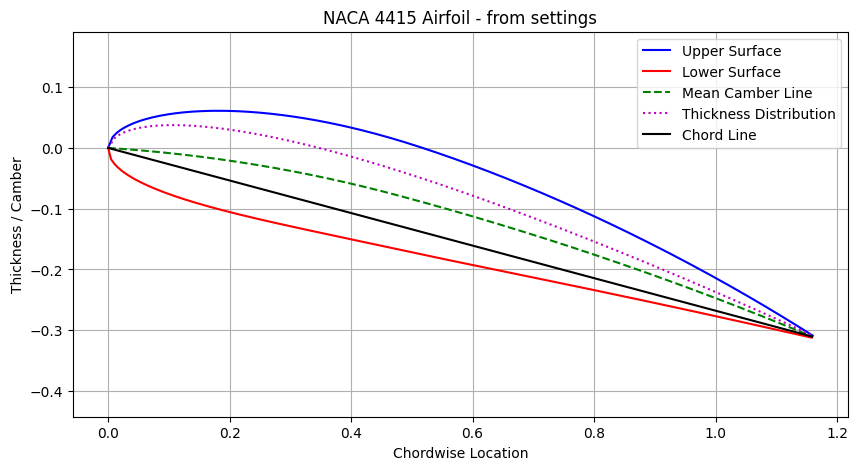

In [1]:
from airfoil.airfoil import NACA4
from settings.initial_settings import InitialSettingsReader

settings = InitialSettingsReader('../input/initial_settings.json')

naca_4415 = NACA4("4415", chord_length=1.2, resolution=200)
naca_4415.set_angle_of_attack(15)
naca_4415.plot(title="NACA 4415 Airfoil")

naca_4415_2 = NACA4(setup=settings)
naca_4415_2.set_angle_of_attack(15)
naca_4415_2.plot(title="NACA 4415 Airfoil - from settings")

Downloaded b737d to C:\Users\Arkadiusz Drabik\Desktop\Nowy folder\code\repos\OpenFOAM_airfoil\input\airfoils\b737d.dat


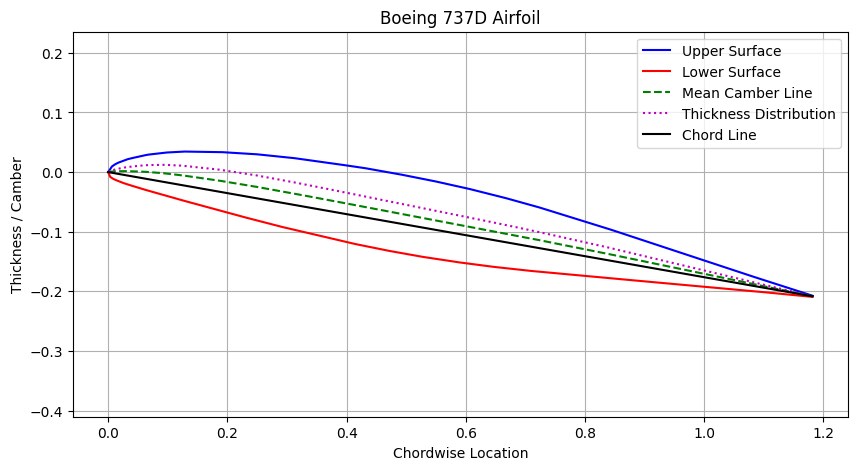

Downloaded b737d to C:\Users\Arkadiusz Drabik\Desktop\Nowy folder\code\repos\OpenFOAM_airfoil\input\airfoils\b737d.dat


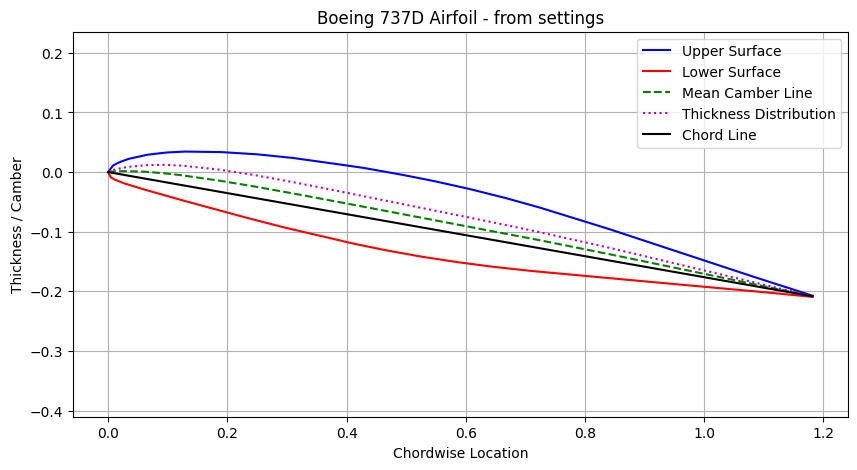

In [2]:
from airfoil.airfoil import UIUCAirfoil
from settings.initial_settings import InitialSettingsReader

settings = InitialSettingsReader('../input/initial_settings.json')

b737d = UIUCAirfoil("b737d", chord_length=1.2, resolution=250)
b737d.set_angle_of_attack(10)
b737d.plot(title="Boeing 737D Airfoil")

b737d_2 = UIUCAirfoil(setup=settings)
b737d_2.set_angle_of_attack(10)
b737d_2.plot(title="Boeing 737D Airfoil - from settings")

In [1]:
from simulation.preprocess.mesh import snappy_hex_mesh_dict
from simulation.preprocess.mesh import block_mesh_dict
from settings.initial_settings import InitialSettingsReader
from airfoil.airfoil import NACA4
from pathlib import Path

settings = InitialSettingsReader("../input/initial_settings.json")
airfoil = NACA4("2412", chord_length=1.0, resolution=300)

block_mesh_dict(
    airfoil=airfoil,
    setup=settings,
    output_path=Path("./blockMeshDict"),
)

snappy_hex_mesh_dict(
    airfoil=airfoil,
    setup=settings,
    output_path=Path("./snappyHexMeshDict")
)

ModuleNotFoundError: No module named 'simulation.preprocess'

In [2]:
from simulation.preparation.prepare_case import prepare_openfoam_case
from settings.initial_settings import InitialSettingsReader
from airfoil.airfoil import NACA4
from pathlib import Path

settings = InitialSettingsReader("../input/initial_settings.json")
airfoil = NACA4("2412", chord_length=1.0, resolution=300)

prepare_openfoam_case(Path("../input"), "airfoilcase", airfoil, settings)

Velocity provided, setting boundary conditions from it (default variant).
